In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import linalg
from matplotlib import pyplot as plt

In [33]:
def q(x):
    #return float(1)
    #return (1 - x) / 2
    return (1+x/2)*(3-x)


def r(x):
    #return float(-2)
    #return np.log(3 + x) / 2
    #return (1 + np.sin(x) / 2)
    return np.exp(x/2)*(3-x)


def f(x):
    #return float(0)
    #return 1 + x / 3
    return (2-x)*(3-x)

alpha = 0
beta = 0

begin = -1
end = 1

In [ ]:
begin = 0
end = 1
N = 1000

grid = np.linspace(begin, end, N+1)
h = grid[1] - grid[0]

A = np.zeros((N-1, N-1))
b = np.zeros(N-1)

A[0, 0] = -2/h**2 + r(grid[1])
A[0, 1] =  1/h**2 + q(grid[1])/(2*h)
b[0] = f(grid[1]) - alpha*A[0, 1]
for i in range(1, N-2):
    A[i, i-1] = 1/h**2 + q(grid[i+1])/(2*h)
    A[i, i] = -2/h**2 + r(grid[i+1])
    A[i, i+1] = A[i, i-1]
    b[i] = f(grid[i])
A[N-2, N-2] = -2/h**2 + r(grid[N-1])
A[N-2, N-3] = 1/h**2 + q(grid[N-1])/(2*h)
b[N-2] = f(grid[N-1]) - beta*A[N-2, N-3]

In [32]:
def calc_(begin, end, N):
    grid = np.linspace(begin, end, N+1)
    h = grid[1] - grid[0]

    A = np.zeros((N-1, N-1))
    b = np.zeros(N-1)

    A[0, 0] = -2/h**2 + r(grid[1])
    A[0, 1] =  1/h**2 + q(grid[1])/(2*h)
    b[0] = f(grid[1]) - alpha*(1/h**2 - q(grid[1])/(2*h))
    for i in range(1, N-2):
        A[i, i-1] = 1/h**2 - q(grid[i+1])/(2*h)
        A[i, i] = -2/h**2 + r(grid[i+1])
        A[i, i+1] = 1/h**2 + q(grid[i+1])/(2*h)
        b[i] = f(grid[i])
    A[N-2, N-2] = -2/h**2 + r(grid[N-1])
    A[N-2, N-3] = 1/h**2 - q(grid[N-1])/(2*h)
    b[N-2] = f(grid[N-1]) - beta*(1/h**2 + q(grid[N-1])/(2*h))

    x = np.zeros(N+1)
    x[1:-1] = linalg.solve(A, b)
    x[0] = alpha
    x[-1] = beta
    return x, h

In [34]:
def calc(begin, end, N):
    grid = np.linspace(begin, end, N+1)
    h = grid[1] - grid[0]
    #h = (end-begin)/N

    A = np.zeros((3, N-1))
    b = np.zeros(N-1)

    for i in range(1, N-1):
        A[0, i] =  1/(h**2) + q(grid[i])/(2*h)
    for i in range(0, N-1):
        A[1, i] =  -2/(h**2) + r(grid[i+1])
    for i in range(0, N-2):
        #A[0, i+1] =  1/h**2 + q(grid[i+1])/(2*h)
        A[2, i] =  1/(h**2) - q(grid[i+1])/(2*h)


    b[0] = f(grid[1]) - alpha*(1/(h**2) - q(grid[1])/(2*h))
    for i in range(1, N-2):
        b[i] = f(grid[i+1])
    b[N-2] = f(grid[N-1]) - beta*(1/(h**2) + q(grid[N-1])/(2*h))

    x = np.zeros(N+1)
    x[1:-1] = linalg.solve_banded((1, 1), A, b)
    x[0] = alpha
    x[-1] = beta
    return x, h

def err(delta: np.ndarray):
    return np.abs(delta).max()
    #return linalg.norm(delta)/np.sqrt(delta.size)

def delta_func(x_prev, x_curr):
    delta = np.zeros_like(x_curr)
    for i in range(0, x_prev.size):
        delta[2*i] = x_curr[2*i] - x_prev[i] / ((2**1)-1)

    for i in range(1, delta.size-1, 2):
        delta[i] = (delta[i-1] + delta[i+1])/2

    return delta

In [6]:
def func(x):
    return (np.exp(2-2*x)*(np.exp(3*x)-1))/(np.exp(3)-1)

func_v = np.vectorize(func)    

func_v(0.5)

array(0.49588399)

In [35]:
r_ = 1
eps = 2e-6

errs=[]
Ns=[]

n=10

x_prev, h = calc(begin, end, n) # N must be even
n = n*2
x_curr, h = calc(begin, end, n)
delta = delta_func(x_prev, x_curr)
while err(delta) > eps:
    print(err(delta))
    errs.append(err(delta))
    Ns.append(1/h)
    
    x_prev = x_curr
    n = n*2
    x_curr, h = calc(begin, end, n)
    delta = delta_func(x_prev, x_curr)
x_curr = x_curr+delta

0.4474661741310362
0.13834142509310698
0.050485449243645064
0.020844033671799878
0.009355046174679416
0.004414075051785815
0.002141712109207994
0.001054594927225594
0.0005232403763573146
0.00026060682573447735
0.0001300505502221938
6.496160655089511e-05
3.246580211069272e-05
1.6249634102294408e-05
8.084277749453861e-06
4.037710461979316e-06
2.061181180401661e-06


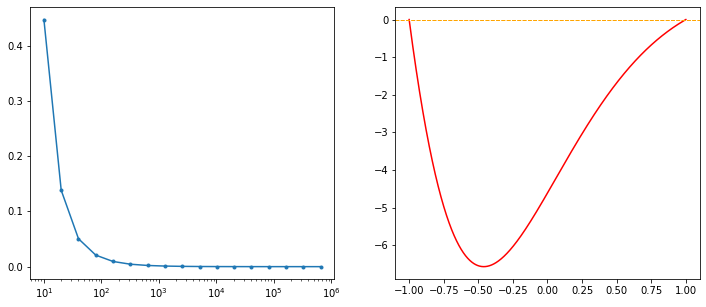

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(Ns, errs, '.-')
plt.xscale('log')

plt.subplot(122)
ls = np.linspace(begin, end, n+1)
plt.plot(ls, x_curr, 'r')
plt.axhline(y=alpha, linestyle='--', linewidth=1, color='orange')
plt.axhline(y=beta, linestyle='--', linewidth=1, color='orange')
#plt.plot(ls, func_v(ls), 'g')
plt.show()


In [37]:
x_curr[x_curr.size//2]

1.2166212406442076